In [1]:
import time
start_time = time.time()
print("Notebook execution started...")

Notebook execution started...


In [2]:
# import Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Problem Understanding

The data file bollywood.csv contains box office collection and social media promotion information about movies released in 2013-2015 period. 

The analysis should yield 5 to 10 useful insights. Clearly highlight the insights in your notebook as a markdown cell. Name the insights as Insight #1, Insight # 2….

# 2. Data Acquisition

### 2.1 Data Source

In [3]:
dataset_url = 'https://drive.google.com/file/d/1dhg0foinB4iRrH13Rk64jpPwbpz7gwzn/view'

### 2.2 Code for converting the above downloaded data into a dataframe

In [4]:
df=pd.read_csv("Bollywood.csv")
print("Bollywood.csv has {} data points with {} variables each.".format(*df.shape))

Bollywood.csv has 149 data points with 10 variables each.


#### Displaying the first 5 and last 5 records.

In [5]:
df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527.0
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137.0
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54.0
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19.0
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224.0


In [6]:
df.tail()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615.0
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513.0
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807.0
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762.0
148,149,23-May-14,Kochadaiiyaan,HS,Action,150,120.00,4740727,13466,2649.0


#### Column headers

In [7]:
df.keys()

Index(['SlNo', 'Release Date', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes'],
      dtype='object')

## Description and statistical summary

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SlNo,149.0,7.500000e+01,4.315669e+01,1.00,38.00,75.0,112.00,149.0
Budget,149.0,2.944295e+01,2.823798e+01,2.00,11.00,21.0,35.00,150.0
BoxOfficeCollection,149.0,5.566725e+01,9.449453e+01,0.01,8.78,28.0,57.45,735.0
YoutubeViews,149.0,3.337920e+06,3.504407e+06,4354.00,1076591.00,2375050.0,4550051.00,23171067.0
YoutubeLikes,149.0,7.877537e+03,1.274805e+04,1.00,1377.00,4111.0,9100.00,101275.0
YoutubeDislikes,146.0,1.198000e+03,1.863792e+03,1.00,194.75,613.5,1387.25,11888.0


In [9]:
df.describe(include = 'float').T

,count,mean,std,min,25%,50%,75%,max
BoxOfficeCollection,149.0,55.667248,94.494531,0.01,8.78,28.0,57.45,735.0
YoutubeDislikes,146.0,1198.000000,1863.792134,1.00,194.75,613.5,1387.25,11888.0


In [10]:
df.describe(include = 'object').T

,count,unique,top,freq
Release Date,149,102,9-May-14,5
MovieName,149,149,2 States,1
ReleaseTime,149,4,N,99
Genre,149,5,Comedy,36


#### statistical summary of the data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      146 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 11.8+ KB


#### Size  of the dataset

In [12]:
df.size

1490

#### Type of Data Attribute

In [13]:
df.dtypes

SlNo                     int64
Release Date            object
MovieName               object
ReleaseTime             object
Genre                   object
Budget                   int64
BoxOfficeCollection    float64
YoutubeViews             int64
YoutubeLikes             int64
YoutubeDislikes        float64
dtype: object

### Check for Null Values

In [14]:
if df.isnull().sum().sum() == 0:
    print("No null values")
    
else:
    print("Null values present")

df.isnull().sum()

Null values present


SlNo                   0
Release Date           0
MovieName              0
ReleaseTime            0
Genre                  0
Budget                 0
BoxOfficeCollection    0
YoutubeViews           0
YoutubeLikes           0
YoutubeDislikes        3
dtype: int64

### Missing values present
### Some columns, like YoutubeDislikes, have missing values, and need to treat before further analyses

# 3. Data Preparation

### 3.1 Check for Duplicate data

In [15]:
if(df.duplicated().sum() == 0):
    print("No duplicated rows")
else:
    print("Duplicates present")

No duplicated rows


### 3.2 Check for Missing data

In [16]:
if(df.isna().sum().sum() == 0):
    print("No missing data")
else:
    print("Missing data present")
df.isna().sum()

Missing data present


SlNo                   0
Release Date           0
MovieName              0
ReleaseTime            0
Genre                  0
Budget                 0
BoxOfficeCollection    0
YoutubeViews           0
YoutubeLikes           0
YoutubeDislikes        3
dtype: int64

### 3.3 Data Cleaning

### Fill Missing Values with Zero, missing dislikes mean no dislikes

In [17]:
df['YoutubeDislikes'].fillna(0, inplace=True)


### Final Check

In [18]:
if df.isnull().sum().sum() == 0:
    print("No null values")
    
else:
    print("Null values present")

df.isnull().sum()

No null values


SlNo                   0
Release Date           0
MovieName              0
ReleaseTime            0
Genre                  0
Budget                 0
BoxOfficeCollection    0
YoutubeViews           0
YoutubeLikes           0
YoutubeDislikes        0
dtype: int64

### Data inconsistencies

#### Handling outliers

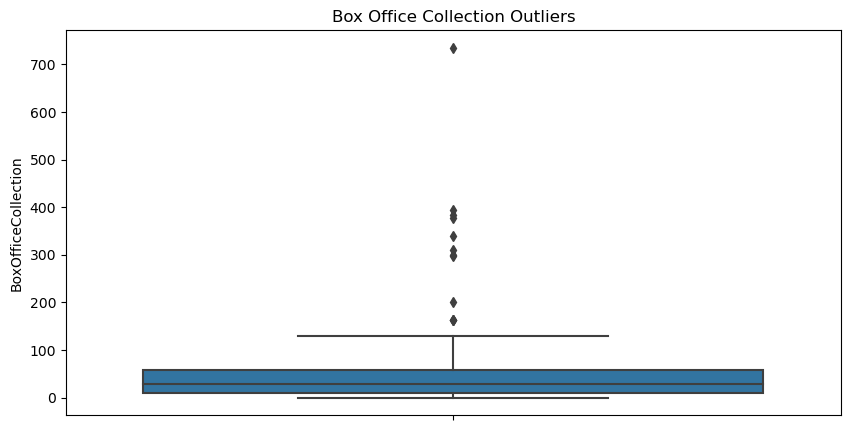

In [19]:
# Box Plot for Outlier Detection
plt.figure(figsize=(10,5))
sns.boxplot(y=df['BoxOfficeCollection'])
plt.title('Box Office Collection Outliers')
plt.show()

### Outliers present in the data
### Certain movies have extreme box office collections, which could indicate blockbuster hits.

In [20]:
# Outlier Detection using IQR
numeric_columns = ['BoxOfficeCollection', 'Budget', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f'Outliers in {column}: {len(outliers)}')

Outliers in BoxOfficeCollection: 12
Outliers in Budget: 14
Outliers in YoutubeViews: 6
Outliers in YoutubeLikes: 10
Outliers in YoutubeDislikes: 10


In [21]:
# Check for negative values in numerical columns
numeric_columns = ['BoxOfficeCollection', 'Budget', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']
negative_values = {col: (df[col] < 0).sum() for col in numeric_columns}
print("Negative values in dataset:")
print(negative_values)

Negative values in dataset:
{'BoxOfficeCollection': 0, 'Budget': 0, 'YoutubeViews': 0, 'YoutubeLikes': 0, 'YoutubeDislikes': 0}


### Check for Negative values 
### No Negative values present in the data 



In [22]:
df.dtypes

SlNo                     int64
Release Date            object
MovieName               object
ReleaseTime             object
Genre                   object
Budget                   int64
BoxOfficeCollection    float64
YoutubeViews             int64
YoutubeLikes             int64
YoutubeDislikes        float64
dtype: object

In [23]:
df['ProfitMargin'] = df['BoxOfficeCollection'] - df['Budget']

In [24]:
df['LikeDislikeRatio'] = df['YoutubeLikes'] / (df['YoutubeLikes'] + df['YoutubeDislikes'])

In [25]:
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%d-%b-%y')

In [26]:
df['YoutubeDislikes']=df['YoutubeDislikes'].astype('int')

In [27]:
df['LikeDislikeRatio']=df['LikeDislikeRatio'].astype('int')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SlNo                 149 non-null    int64         
 1   Release Date         149 non-null    datetime64[ns]
 2   MovieName            149 non-null    object        
 3   ReleaseTime          149 non-null    object        
 4   Genre                149 non-null    object        
 5   Budget               149 non-null    int64         
 6   BoxOfficeCollection  149 non-null    float64       
 7   YoutubeViews         149 non-null    int64         
 8   YoutubeLikes         149 non-null    int64         
 9   YoutubeDislikes      149 non-null    int32         
 10  ProfitMargin         149 non-null    float64       
 11  LikeDislikeRatio     149 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(4), object(3)
memory usage: 12.9+ KB


In [29]:
df.columns

Index(['SlNo', 'Release Date', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes', 'ProfitMargin', 'LikeDislikeRatio'],
      dtype='object')

# 4. Data Exploration using various plots

### Categorical Feature Analysis

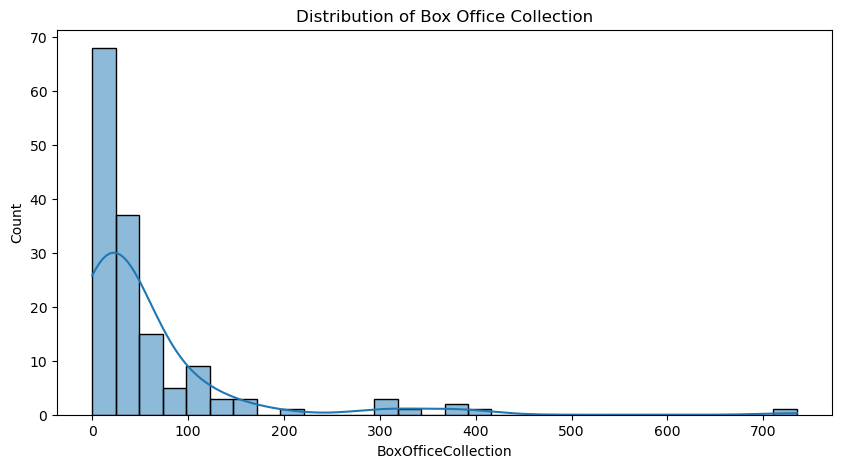

In [30]:
# Univariate Analysis
plt.figure(figsize=(10,5))
sns.histplot(df['BoxOfficeCollection'], bins=30, kde=True)
plt.title('Distribution of Box Office Collection')
plt.show()

## Insight #1- 
### Skewed Box Office Collection Distribution
### The distribution of box office collections is right-skewed, indicating that only a few movies generate very high revenue.
### The majority of films earn below 100 crores, suggesting that blockbuster movies are rare.
### A few outliers exceed 400-700 crores, highlighting that only select movies achieve massive commercial success.
### The sharp decline in frequency beyond 100 crores suggests that only a small percentage of films achieve high earnings.

In [31]:
# Box Office Collection greater than 300 crore
high_grossing_movies = df[df['BoxOfficeCollection'] > 300]

print(high_grossing_movies[['MovieName', 'BoxOfficeCollection']])


                   MovieName  BoxOfficeCollection
26            Happy New Year                383.0
43                      Kick                377.0
82   Yeh Jawaani Hai Deewani                311.0
89                        PK                735.0
92                 Bang Bang                340.0
115          Chennai Express                395.0


## Numerical Feature Analysis

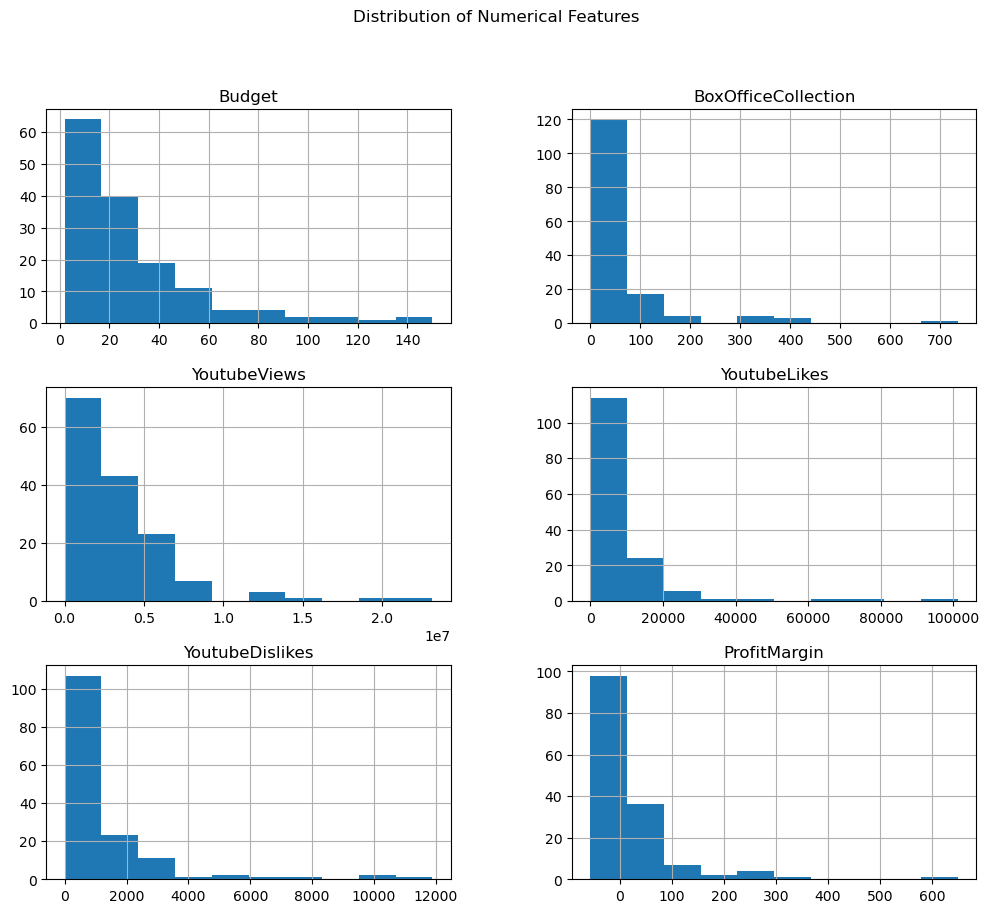

In [42]:
numerical_features = ['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes', 'ProfitMargin']
df[numerical_features].hist(figsize=(12, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

Insights from above numerical analysis

1. Budget and BoxOfficeCollection: There seems to be a positive correlation between the budget of a movie and its box office collection. This suggests that movies with higher budgets tend to perform better at the box office.

2. YouTubeViews and YouTubeLikes: The number of YouTube views and likes for a movie appears to have a strong positive correlation. This indicates that movies with more views are also likely to have more likes.

3. ProfitMargin: The profit margin of movies varies significantly. Some movies have very high profit margins, while others have very low or even negative profit margins. This suggests that there is a lot of variability in the profitability of movies.

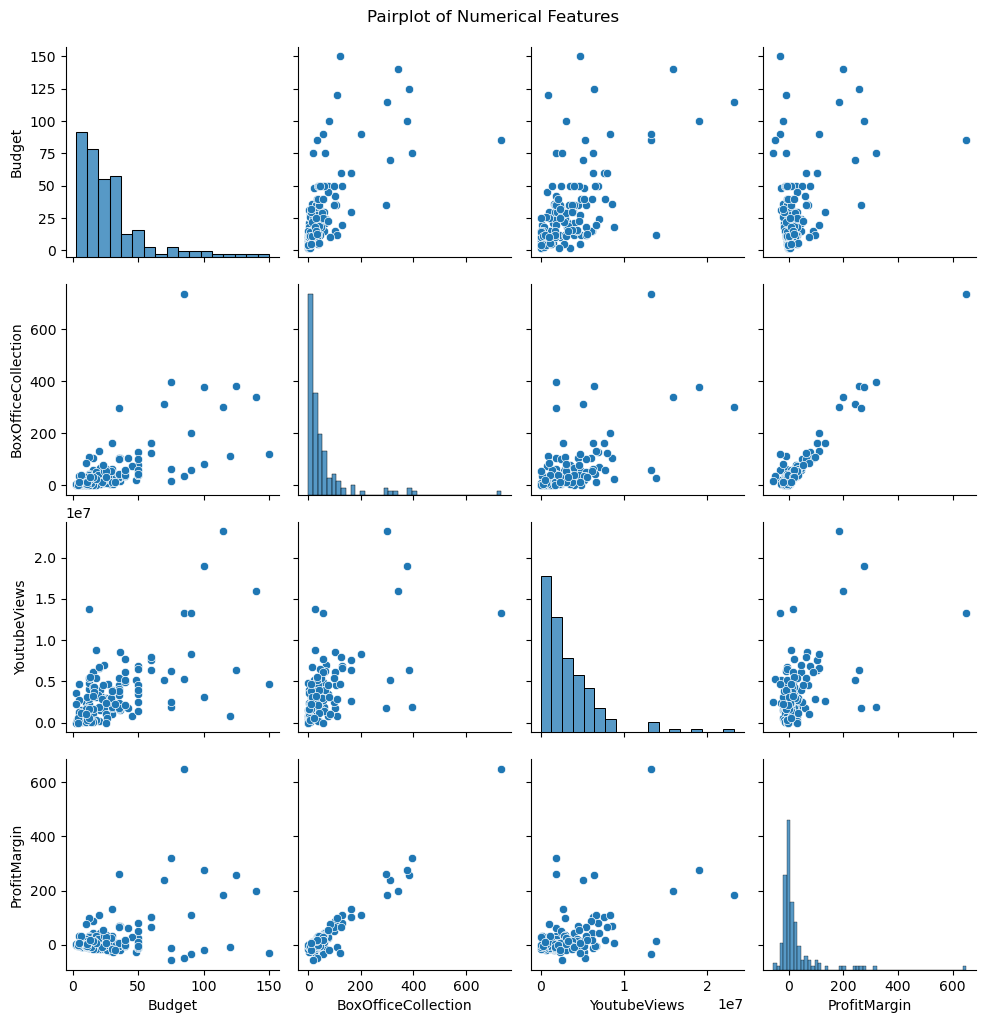

In [43]:
# Pairplot of selected numerical features to explore relationships
sns.pairplot(df[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'ProfitMargin']])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


#Insights from above pairplot

1. There is a strong positive correlation between Box Office Collection and Profit Margin, indicating that higher revenue typically leads to higher profits.  
2. The distribution of YouTube Views is highly skewed, suggesting that a few movies receive an exceptionally high number of views compared to the rest.

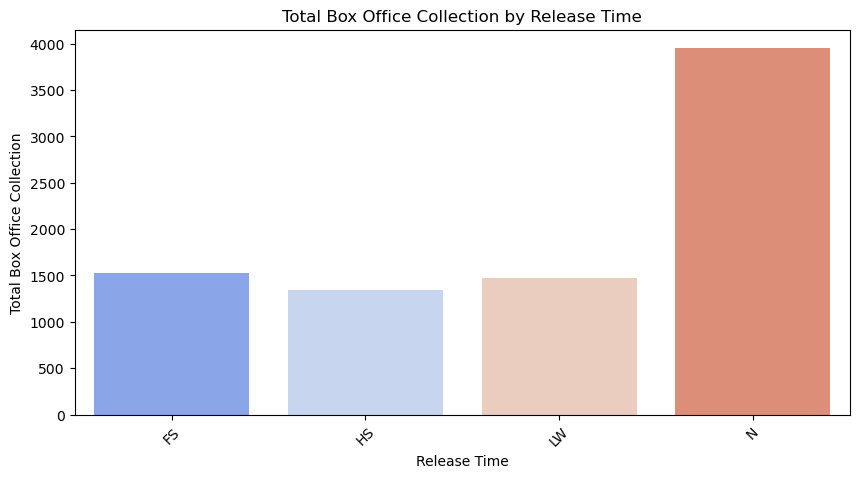

In [32]:
if 'ReleaseTime' in df.columns and 'BoxOfficeCollection' in df.columns:
    # Aggregate box office collection by release time
    time_collection = df.groupby('ReleaseTime')['BoxOfficeCollection'].sum().reset_index()

    # Plot bar chart
    plt.figure(figsize=(10, 5))
    sns.barplot(x=time_collection['ReleaseTime'], y=time_collection['BoxOfficeCollection'], palette='coolwarm')
    plt.title('Total Box Office Collection by Release Time')
    plt.xlabel('Release Time')
    plt.ylabel('Total Box Office Collection')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Required columns 'ReleaseTime' or 'BoxOfficeCollection' not found in dataset.")

## Insight #2 - 
### Normal releases (N) have the highest total box office collection, outperforming other release periods.
### Festive Season (FS), Holiday Season (HS), and Long Weekend (LW) show similar earnings, indicating they don’t always guarantee high success.

### This insight can help production houses decide optimal movie release strategies for maximum revenue.

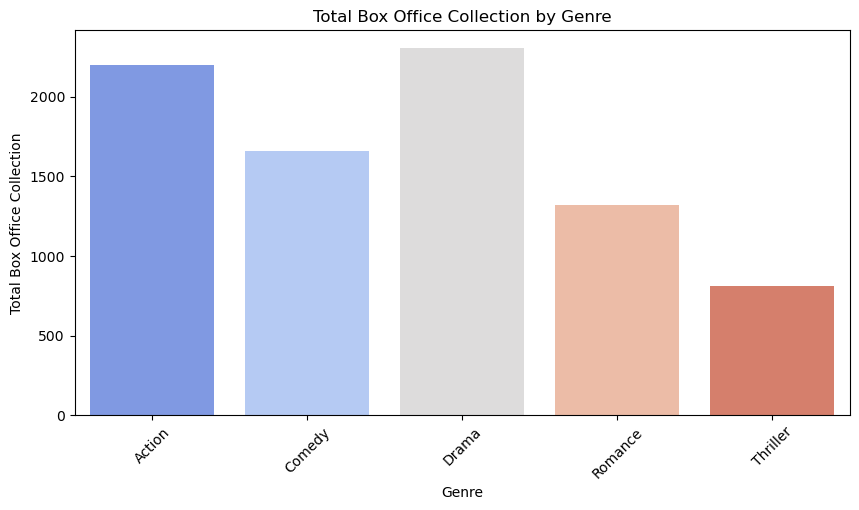

In [33]:
if 'Genre' in df.columns and 'BoxOfficeCollection' in df.columns:
    # Aggregate box office collection by release time
    time_collection = df.groupby('Genre')['BoxOfficeCollection'].sum().reset_index()

    # Plot bar chart
    plt.figure(figsize=(10, 5))
    sns.barplot(x=time_collection['Genre'], y=time_collection['BoxOfficeCollection'], palette='coolwarm')
    plt.title('Total Box Office Collection by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Total Box Office Collection')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Required columns 'genre' or 'BoxOfficeCollection' not found in dataset.") 

## Insight #3- 
### Drama and Action genres dominate box office collections, with Drama slightly outperforming Action.
### Comedy and Romance generate moderate revenue, indicating they have a stable but not top-tier audience.
### Thriller movies earn the least, suggesting they may have a niche audience or lower commercial appeal.
### Action and Drama movies might have a broader audience reach, leading to higher revenue potential.

# Numerical Feature Analysis

C:\Users\himde\AppData\Local\Temp\ipykernel_32356\2376760299.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


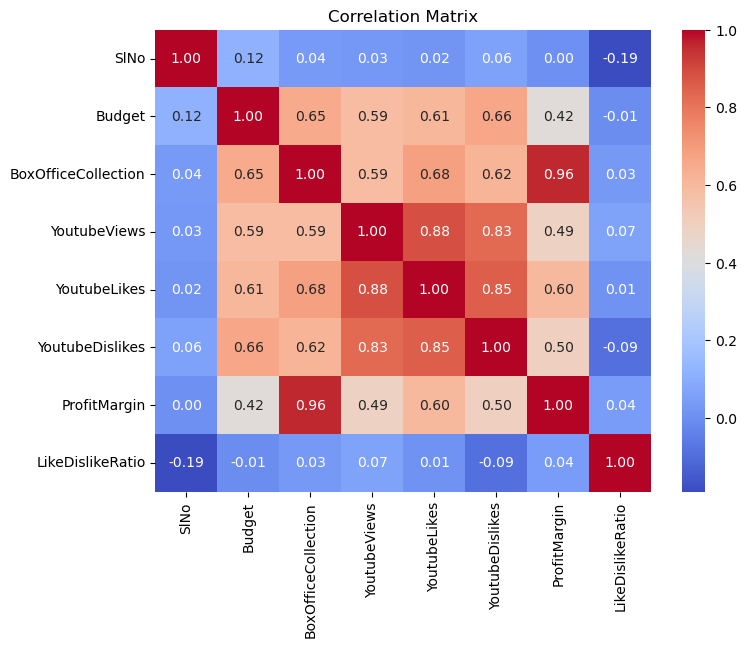

In [34]:
# Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Insight #4-
### Budget and Box Office Collection have a strong positive correlation (0.65), indicating that movies with higher budgets tend to generate higher box office revenue.  
### While budget is an important factor, it is not the sole determinant of success, as the correlation is not perfect (less than 1). Other factors like content, marketing, and audience reception likely play a role.

## Insight #5 - 
## Box Office Collection has a moderate to strong positive correlation with YouTube metrics:

### YouTube Views (0.59) – Movies with higher box office collections tend to have more YouTube views, suggesting that online engagement may reflect audience interest.
### YouTube Likes (0.68) – A stronger correlation indicates that movies with high box office earnings receive more likes, suggesting positive audience reception online.
### YouTube Dislikes (0.62) – A moderately strong correlation implies that even high-grossing movies receive dislikes, possibly due to differing audience opinions.
### Overall Insight: Strong YouTube engagement (views, likes, and even dislikes) can be an indicator of a movie's box office performance, highlighting the role of digital marketing and social media buzz in influencing audience interest.


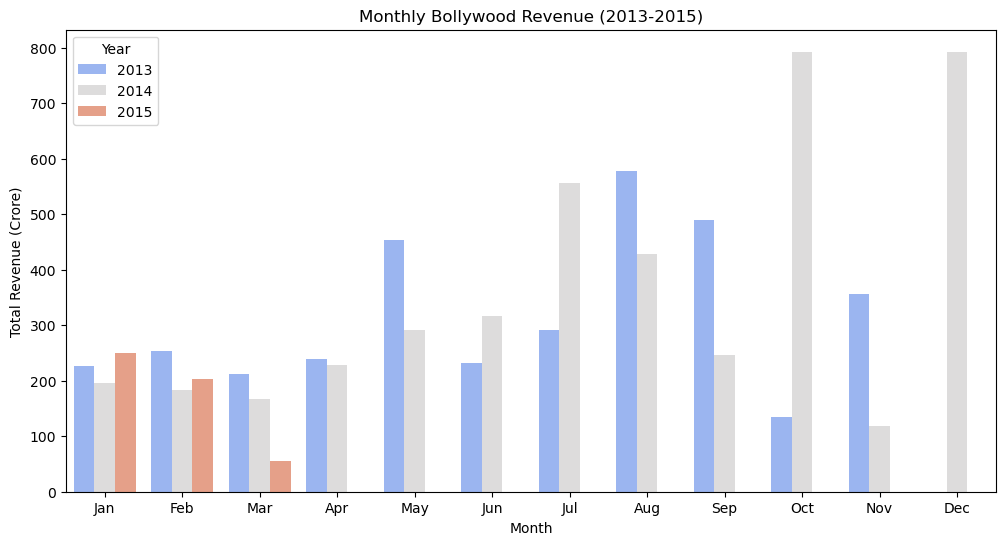

In [35]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')


df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.strftime('%b')  # Extract month as short name (e.g., Jan, Feb)

# Filter data for years 2013 to 2015
df_filtered = df[(df['Year'] >= 2013) & (df['Year'] <= 2015)]

# Group by Year and Month to calculate total revenue
monthly_revenue = df_filtered.groupby(['Month', 'Year'])['BoxOfficeCollection'].sum().reset_index()

# Sort the months in chronological order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_revenue['Month'] = pd.Categorical(monthly_revenue['Month'], categories=month_order, ordered=True)
monthly_revenue = monthly_revenue.sort_values(['Month', 'Year'])

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='BoxOfficeCollection', hue='Year', data=monthly_revenue, palette='coolwarm')

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Total Revenue (Crore)")
plt.title("Monthly Bollywood Revenue (2013-2015)")
plt.legend(title="Year")

# Show the plot
plt.show()

## Insight #6- 
### the Monthly Bollywood Revenue (2013-2015) 
### Peak Revenue Months: May, July, August, October, and December indicate strong box office performances.
### October & December 2014 Spikes: Suggest blockbuster releases significantly boosting revenue.
### Steady Early-Year Revenue: January and February show stable collections across years.
### 2014 Outperforms Other Years: Especially in July, October, November, and December.

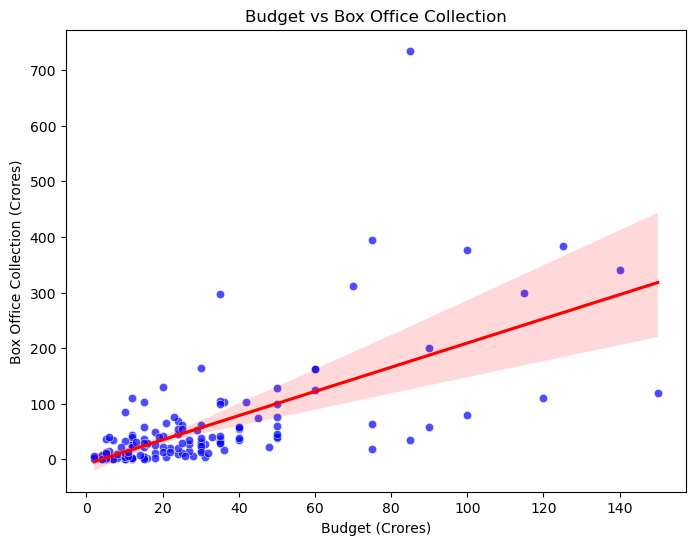

In [36]:
# Convert necessary columns to numeric (if not already)
df['Budget'] = pd.to_numeric(df['Budget'], errors='coerce')
df['BoxOfficeCollection'] = pd.to_numeric(df['BoxOfficeCollection'], errors='coerce')

# Drop rows with missing values in Budget or Box Office Collection
df = df.dropna(subset=['Budget', 'BoxOfficeCollection'])

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Budget'], y=df['BoxOfficeCollection'], alpha=0.7, color='blue')

# Add trend line (optional)
sns.regplot(x=df['Budget'], y=df['BoxOfficeCollection'], scatter=False, color='red')

# Labels and title
plt.xlabel("Budget (Crores)")
plt.ylabel("Box Office Collection (Crores)")
plt.title("Budget vs Box Office Collection")

# Show plot
plt.show()

## Insight #7 - 
### Positive Correlation: There is a general upward trend, meaning movies with higher budgets tend to generate higher box office collections.
### Outliers Present: Some movies with lower budgets have achieved significantly high box office collections, while a few high-budget movies have underperformed.
### Variance in Performance: The shaded region around the trend line indicates variability, showing that not all high-budget movies guarantee high revenue.

<Figure size 1400x700 with 0 Axes>

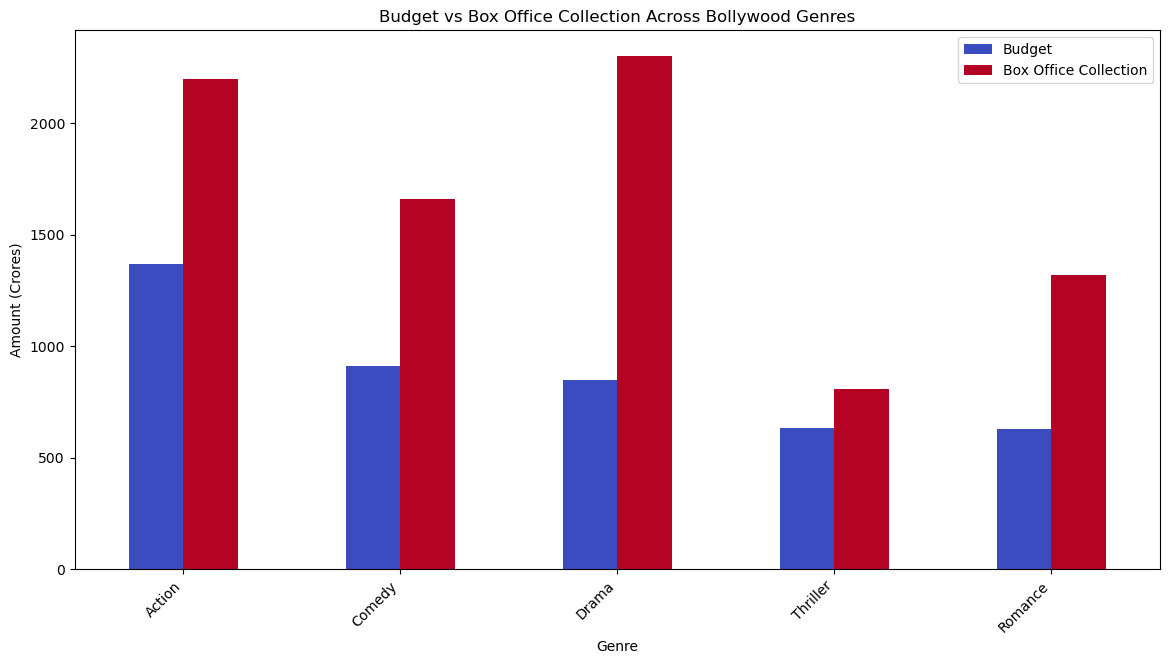

In [37]:
# Convert 'Budget' and 'BoxOfficeCollection' columns to numeric (handle errors)
df['Budget'] = pd.to_numeric(df['Budget'], errors='coerce')
df['BoxOfficeCollection'] = pd.to_numeric(df['BoxOfficeCollection'], errors='coerce')

# Group by Genre and sum both Budget and Box Office Collection
genre_summary = df.groupby('Genre')[['Budget', 'BoxOfficeCollection']].sum().reset_index()

# Sort values for better visualization
genre_summary = genre_summary.sort_values(by='Budget', ascending=False)

# Set figure size
plt.figure(figsize=(14, 7))

# Create a bar plot for Budget and Box Office Collection
genre_summary.plot(x='Genre', kind='bar', stacked=False, figsize=(14, 7), colormap='coolwarm')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel("Genre")
plt.ylabel("Amount (Crores)")
plt.title("Budget vs Box Office Collection Across Bollywood Genres")

# Show the plot
plt.legend(["Budget", "Box Office Collection"])
plt.show()

## Insight #8- 
### Both Drama and Action genres have the highest collections, surpassing ₹2000 crores, making them dominant in revenue generation.
#### The budget for these genres is also high, indicating large-scale production investments.
### Comedy and Romance Are Cost-Effective
#### Despite lower budgets compared to Action and Drama, Comedy and Romance still generate significant revenue, indicating good ROI (Return on Investment).
### Thriller Has the Lowest Box Office Collection
#### Thriller movies have a relatively lower budget and lesser box office collection, indicating either a niche audience or lower mass appeal compared to other genres.

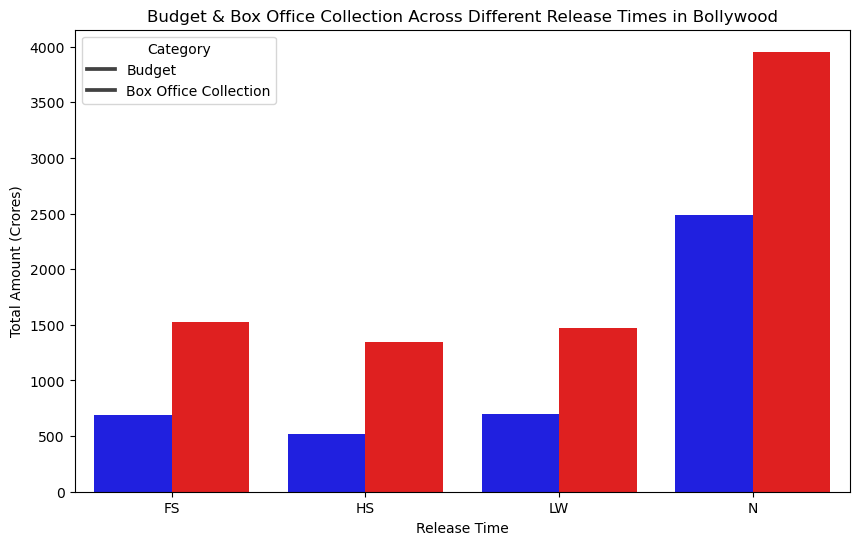

In [38]:
# Convert 'Budget' and 'BoxOfficeCollection' columns to numeric (handle errors)
df['Budget'] = pd.to_numeric(df['Budget'], errors='coerce')
df['BoxOfficeCollection'] = pd.to_numeric(df['BoxOfficeCollection'], errors='coerce')

# Group by 'ReleaseTime' and sum Budget & Box Office Collection
release_summary = df.groupby('ReleaseTime')[['Budget', 'BoxOfficeCollection']].sum().reset_index()

# Set figure size
plt.figure(figsize=(10, 6))

# Create a grouped bar plot
release_summary_melted = release_summary.melt(id_vars="ReleaseTime", var_name="Category", value_name="Amount")
sns.barplot(x='ReleaseTime', y='Amount', hue='Category', data=release_summary_melted, palette=['blue', 'red'])

# Add labels and title
plt.xlabel("Release Time")
plt.ylabel("Total Amount (Crores)")
plt.title("Budget & Box Office Collection Across Different Release Times in Bollywood")

# Show the legend
plt.legend(title="Category", labels=["Budget", "Box Office Collection"])

# Show the plot
plt.show()

## Insight #9 -
### Normal (N) Releases Dominate in Revenue and Investment
#### Movies released during the Normal (N) period have the highest budget (2500 Cr) and the highest box office collection (4000 Cr), making them the most profitable.This suggests that good content and strong marketing can drive success even outside festive periods.
### Festive Season (FS), Holiday Season (HS), and Long Weekend (LW) Have Comparable Returns
#### These three categories have similar box office earnings (1400–1500 Cr), despite some budget variations.This indicates that releasing during a holiday or festival doesn’t always guarantee higher profits.
### Highest ROI for Normal (N) Releases
#### Box office earnings significantly exceed the budget for N releases, meaning they offer the best returns.Movies in FS, HS, and LW categories also generate profits, but their return margins are lower compared to normal releases.

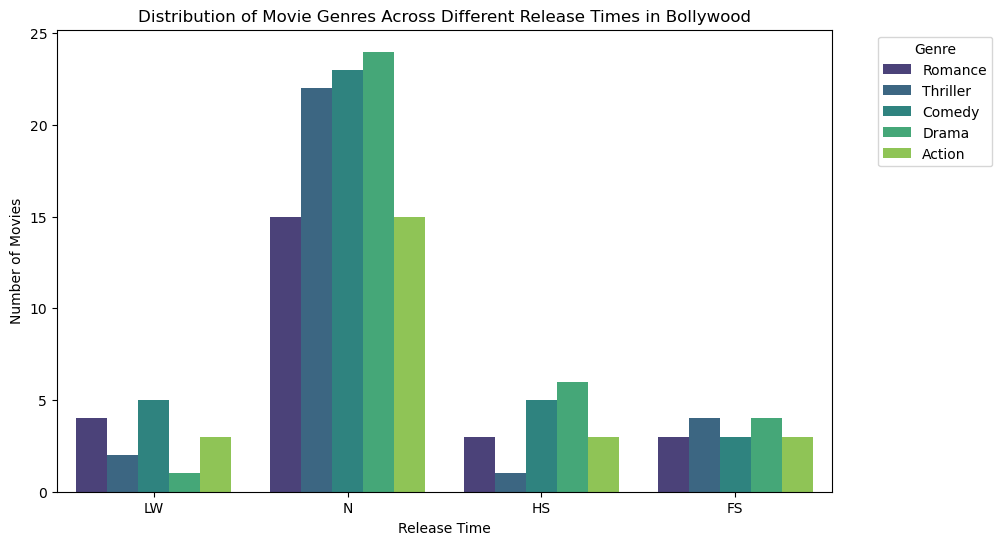

In [39]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a count plot to show the frequency of genres across different release times
sns.countplot(data=df, x="ReleaseTime", hue="Genre", palette="viridis")

# Add labels and title
plt.xlabel("Release Time")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movie Genres Across Different Release Times in Bollywood")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

## Insight #10 - 
### Most movies are released during Normal (N) periods – This is the most preferred release time, especially for Comedy, Drama, and Thriller genres, indicating a strategy to target a larger audience during regular movie-going periods.

### Festive (FS), Holiday (HS), and Long Weekend (LW) releases have fewer movies – Compared to Normal releases, significantly fewer movies are released during FS, HS, and LW periods, but genres like Comedy and Action still maintain some presence.

### Drama and Comedy dominate Normal releases – Among all genres, Drama and Comedy movies are released the most during normal times, suggesting they perform well in routine theatrical releases rather than during holiday seasons.

In [40]:
print("=== Summary Report: Key Insights from Bollywood Movie Data ===\n")

print("1.The box office collection is right-skewed, with a few blockbuster movies earning over 400-700 crores, while most films make below 100 crores.")
print("2. Normal releases generate the highest box office collection, while FS, HS, and LW perform similarly, showing they don’t always guarantee high success.")
print("3. Drama and Action genres dominate box office collections, while Thriller movies earn the least, indicating a niche audience or lower commercial appeal.")
print("4. Higher-budget movies generally generate higher box office revenue, but success also depends on content, marketing, and audience reception.")
print("5. Strong YouTube engagement (views, likes, and dislikes) correlates with box office performance, emphasizing the impact of digital marketing and audience buzz.")
print("6. Bollywood's peak revenue months are May, July, August, October, and December, with 2014 outperforming other years, especially in late months.")
print("7. Higher-budget movies generally earn more, but some low-budget films succeed, and not all high-budget movies guarantee high revenue.")
print("8. Drama and Action dominate box office revenue, Comedy and Romance offer good ROI, while Thriller has the lowest earnings and appeal.")
print("9. Normal (N) releases yield the highest revenue and ROI, while FS, HS, and LW releases have comparable but lower returns despite budget variations.")
print("10.Normal (N) periods are the most preferred release time, especially for Drama and Comedy, while FS, HS, and LW releases have fewer movies but maintain a presence in genres like Comedy and Action.")


=== Summary Report: Key Insights from Bollywood Movie Data ===

1.The box office collection is right-skewed, with a few blockbuster movies earning over 400-700 crores, while most films make below 100 crores.
2. Normal releases generate the highest box office collection, while FS, HS, and LW perform similarly, showing they don’t always guarantee high success.
3. Drama and Action genres dominate box office collections, while Thriller movies earn the least, indicating a niche audience or lower commercial appeal.
4. Higher-budget movies generally generate higher box office revenue, but success also depends on content, marketing, and audience reception.
5. Strong YouTube engagement (views, likes, and dislikes) correlates with box office performance, emphasizing the impact of digital marketing and audience buzz.
6. Bollywood's peak revenue months are May, July, August, October, and December, with 2014 outperforming other years, especially in late months.
7. Higher-budget movies generally ear

In [41]:
end_time = time.time()
execution_time = end_time - start_time
execution_time_minutes = execution_time / 60

print("Notebook execution finished.")
print("Total execution time:", execution_time_minutes, "minutes")

Notebook execution finished.
Total execution time: 0.06862874825795491 minutes
